In [71]:


# Author - Narayan Krishnamoorthy - October 3rd - First ever genuine attempt to write a predictive algorithm
# We are trying to predict the onset of diabetes based on diagnostic information
# The dataset has been sourced from kaggle - under Pima Indians Diabetes Database

# Importing all the rockstar packages that are required to make this a meaningful venture


import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import roc_auc_score
#from sklearn.datasets import make_classification - 

from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.cross_validation import train_test_split
from math import sqrt
%matplotlib inline


In [72]:
# Reading the csv file which happens to be on my PC
diagnostic = pd.read_csv('diabetes.csv')

# Attributes:
# Pregnancies: Number of times pregnant
# Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
# BloodPressure: Diastolic blood pressure (mm Hg)
# SkinThickness: Triceps skin fold thickness (mm)
# Insulin: 2-Hour serum insulin (mu U/ml)
# BMI: Body mass index (weight in kg/(height in m)^2)
# DiabetesPedigreeFunction: Diabetes pedigree function
# Age: Age (years)
# Outcome: Class variable (0 or 1)

# Displaying the leading records in this file
diagnostic.head()
print(diagnostic.describe())



       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

In [73]:
# There are missing values that need to be treated. 
diagnostic['Glucose'] = diagnostic['Glucose'].replace(0,diagnostic['Glucose'][diagnostic['Glucose']!=0].mean())
diagnostic['Pregnancies'] = diagnostic['Pregnancies'].replace(0,diagnostic['Pregnancies'][diagnostic['Pregnancies']!=0].mean())
diagnostic['BloodPressure'] = diagnostic['BloodPressure'].replace(0,diagnostic['BloodPressure'][diagnostic['BloodPressure']!=0].mean())
diagnostic['SkinThickness'] = diagnostic['SkinThickness'].replace(0,diagnostic['SkinThickness'][diagnostic['SkinThickness']!=0].mean())
diagnostic['Insulin'] = diagnostic['Insulin'].replace(0,diagnostic['Insulin'][diagnostic['Insulin']!=0].mean())
diagnostic['BMI'] = diagnostic['BMI'].replace(0,diagnostic['BMI'][diagnostic['BMI']!=0].mean())



In [74]:
# After missing values treatment, do a quick data profile check

print(diagnostic.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      4.494673  121.686763      72.405184      29.153420  155.548223   
std       2.975395   30.435949      12.096346       8.790942   85.021108   
min       1.000000   44.000000      24.000000       7.000000   14.000000   
25%       2.000000   99.750000      64.000000      25.000000  121.500000   
50%       4.494673  117.000000      72.202592      29.153420  155.548223   
75%       6.000000  140.250000      80.000000      32.000000  155.548223   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    32.457464                  0.471876   33.240885    0.348958  
std      6.875151                  0.331329   11.760232    0.476951  
min     18.200000                  

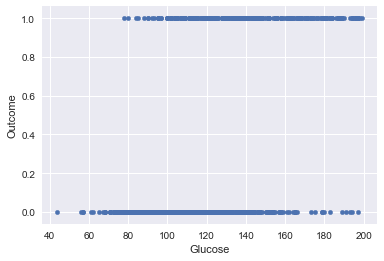

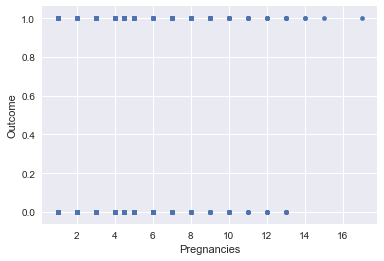

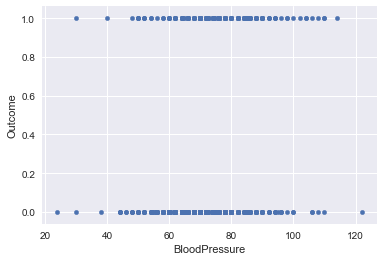

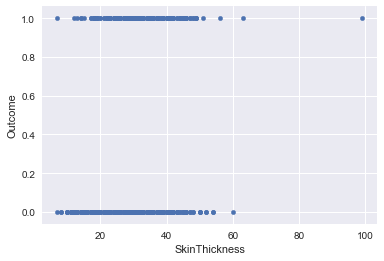

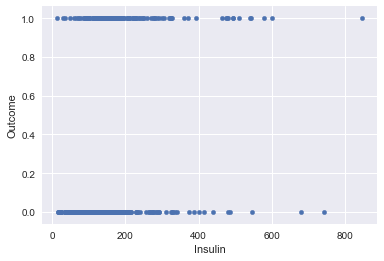

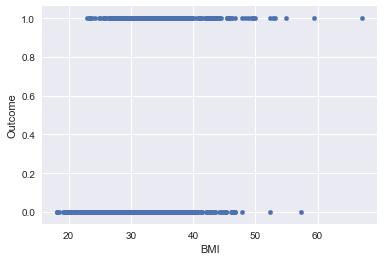

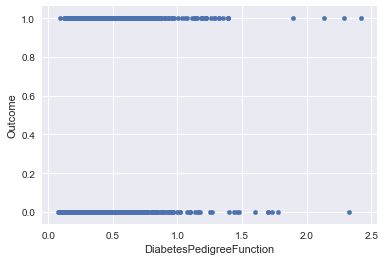

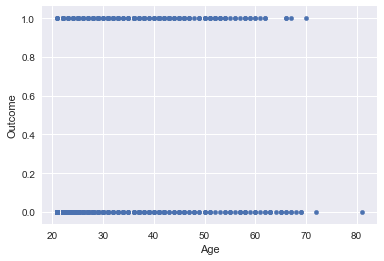

In [75]:

# Doing some analysis to understand the data better
#sns.lmplot(x='Glucose', y='Outcome', data=diagnostic, ci=None) 
#sns.lmplot(x='Pregnancies', y='Outcome', data=diagnostic, ci=None)
#sns.lmplot(x='BloodPressure', y='Outcome', data=diagnostic, ci=None)
#sns.lmplot(x='SkinThickness', y='Outcome', data=diagnostic, ci=None)
#sns.lmplot(x='Insulin', y='Outcome', data=diagnostic, ci=None)
#sns.lmplot(x='BMI', y='Outcome', data=diagnostic, ci=None)
#sns.lmplot(x='DiabetesPedigreeFunction', y='Outcome', data=diagnostic, ci=None)
#sns.lmplot(x='Age', y='Outcome', data=diagnostic, ci=None)

# Scatter plots for the heck of it
diagnostic.plot(kind='scatter',x='Glucose',y='Outcome')
diagnostic.plot(kind='scatter',x='Pregnancies',y='Outcome')
diagnostic.plot(kind='scatter',x='BloodPressure',y='Outcome')
diagnostic.plot(kind='scatter',x='SkinThickness',y='Outcome')
diagnostic.plot(kind='scatter',x='Insulin',y='Outcome')
diagnostic.plot(kind='scatter',x='BMI',y='Outcome')
diagnostic.plot(kind='scatter',x='DiabetesPedigreeFunction',y='Outcome')
diagnostic.plot(kind='scatter',x='Age',y='Outcome')

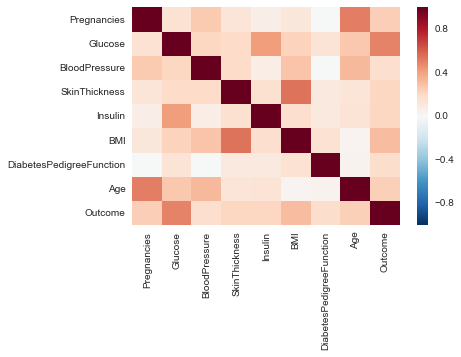

In [76]:
# correlation matrix (ranges from -1 to 1)
diagnostic.corr()
sns.heatmap(diagnostic.corr())

In [77]:
# Define X, y, fit it
#feature_cols = ['Glucose','Pregnancies','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']

feature_cols = ['Glucose','Pregnancies','BloodPressure','Insulin','BMI','DiabetesPedigreeFunction','Age']

#feature_cols = ['Glucose','Pregnancies','Insulin','BMI','DiabetesPedigreeFunction','Age']

X = diagnostic[feature_cols]
y = diagnostic.Outcome

# Split the dataset and create training and testing datasets
# Create a random variable and create a test and training set
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=123)

# a few helper functions - was not required after i discovered metrics.accuracy_score
#def accuracy_report(_logreg):
#    print("Accuracy: %0.2f%%" % (100 * _logreg.score(X_test, y_test)))
#
    #Print the accuracy on the test and training dataset
#    training_accuracy = _logreg.score(X_train, y_train)
#    test_accuracy = _logreg.score(X_test, y_test)
#    print("Accuracy on training data: %0.2f" % (training_accuracy))

In [78]:
# fit a linear regression model and store the class predictions
logreg = LogisticRegression(C=1e9)

logreg.fit(X_train,y_train)

y_pred = logreg.predict(X_test)
#print(accuracy_report(logreg))  - Was not required anymore

# A fancier way to evaluate the model is to compute “precision” and “recall”. Precision and recall are defined:
# Precision = TP / (TP+FP)
# Recall = TP / (TP+FN) 


print("Precision score is ", metrics.precision_score(y_test, y_pred))
print("Recall score is ", metrics.recall_score(y_test, y_pred))
print("Accuracy score is ", metrics.accuracy_score(y_test, y_pred))
print("f1 score is ", metrics.f1_score(y_test, y_pred))

# THEN make predictions on X
assorted_pred_class = logreg.predict(X)
assorted_actual_class = y

pd.DataFrame(diagnostic)

diagnostic['PredOutcome'] = assorted_pred_class

# Plot the class predictions (scatter then plot red line as above)
#plt.scatter(diagnostic.Glucose, diagnostic.Outcome)
#plt.plot(diagnostic.Glucose, assorted_pred_class, color='red')

print('Result of Logistic Regression with all features')
print('*********************************************************************************')
coeff = logreg.coef_
print(feature_cols)
print(coeff)  
print('Intercept is ',logreg.intercept_)
print('Confusion Matrix follows')
print(confusion_matrix(diagnostic.Outcome,diagnostic.PredOutcome))

# Not required but was stupid enough to include the first time
# rms = sqrt(mean_squared_error(diagnostic.Outcome, diagnostic.PredOutcome))
# print('Root Mean Square error is ',rms)
# Stupidity ends


print('*********************************************************************************')
# End of Logistics Regression modeling





Precision score is  0.783333333333
Recall score is  0.643835616438
Accuracy score is  0.796875
f1 score is  0.706766917293
Result of Logistic Regression with all features
*********************************************************************************
['Glucose', 'Pregnancies', 'BloodPressure', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
[[ 0.03521086  0.12469387 -0.00858417 -0.00169846  0.09106365  0.78803999
   0.01718128]]
Intercept is  [-8.72793794]
Confusion Matrix follows
[[449  51]
 [117 151]]
*********************************************************************************


In [79]:
# Ridge Regression begins

# fit a linear regression model and store the class predictions
clf = Ridge(alpha=0.5)

clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)
#print(accuracy_report(logreg))  - Was not required anymore
#print("Precision score is ", metrics.precision_score(y_test, y_pred))
#print("Recall score is ", metrics.recall_score(y_test, y_pred))
#print("Accuracy score is ", metrics.accuracy_score(y_test, y_pred))
#print("f1 score is ", metrics.f1_score(y_test, y_pred))

# THEN make predictions on X
assorted_pred_class = clf.predict(X)
assorted_actual_class = y

pd.DataFrame(diagnostic)

diagnostic['PredOutcome'] = assorted_pred_class

# Plot the class predictions (scatter then plot red line as above)
#plt.scatter(diagnostic.Glucose, diagnostic.Outcome)
#plt.plot(diagnostic.Glucose, assorted_pred_class, color='red')

print('Result of Ridge Regression with all features')
print('*********************************************************************************')
coeff = clf.coef_
print(feature_cols)
print(coeff)  
print('Intercept is ',clf.intercept_)
print('R-square error is ',clf.score(X,y))
#print('Confusion Matrix follows')
#print(confusion_matrix(diagnostic.Outcome,diagnostic.PredOutcome))

# Not required but was stupid enough to include the first time
# rms = sqrt(mean_squared_error(diagnostic.Outcome, diagnostic.PredOutcome))
# print('Root Mean Square error is ',rms)
# Stupidity ends


print('*********************************************************************************')
# End of Ridge Regression modeling



Result of Ridge Regression with all features
*********************************************************************************
['Glucose', 'Pregnancies', 'BloodPressure', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
[ 0.00614668  0.02134125 -0.00123645 -0.00022686  0.01392959  0.1170436
  0.00285919]
Intercept is  -0.978933009476
R-square error is  0.318930207693
*********************************************************************************


In [80]:
# Start of Naive Bayes Multinomial - I kinda like the name. Sounds so Innocent

clf_mn = MultinomialNB().fit(X_train,y_train)


print('Result of Naive Bayes Multinomial with all features')
print('*********************************************************************************')
coeff = clf_mn.coef_
print(feature_cols)
print(coeff)  
print('Intercept is ',clf_mn.intercept_)
#print('R-square error is ',clf_mn.score(X,y))


#Print the accuracy on the test and training dataset for the Naive Bayes model
print("Accuracy on Naive Bayes Multinomial on test data is : %0.2f%%" % (100 * clf_mn.score(X_test, y_test)))
print("Accuracy on Naive Bayes Multinomial on training data is : %0.2f%%" % (100 * clf_mn.score(X_train, y_train)))



Result of Naive Bayes Multinomial with all features
*********************************************************************************
['Glucose', 'Pregnancies', 'BloodPressure', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
[[-1.20295722 -4.47259578 -1.83637201 -0.9817049  -2.5915494  -6.76501309
  -2.54907703]]
Intercept is  [-1.0831081]
Accuracy on Naive Bayes Multinomial on test data is : 70.83%
Accuracy on Naive Bayes Multinomial on training data is : 68.40%


In [81]:
# Start of Naive Bayes - I kinda like the name. Sounds so Innocent

clf_b = BernoulliNB().fit(X_train,y_train)


print('Result of Naive Bayes Bernoulli with all features')
print('*********************************************************************************')
coeff = clf_b.coef_
print(feature_cols)
print(coeff)  
print('Intercept is ',clf_b.intercept_)
#print('R-square error is ',clf_mn.score(X,y))


#Print the accuracy on the test and training dataset for the Naive Bayes model
print("Accuracy on Naive Bayes Bernoulli on test data is : %0.2f%%" % (100 * clf_b.score(X_test, y_test)))
print("Accuracy on Naive Bayes Bernoulli on training data is : %0.2f%%" % (100 * clf_b.score(X_train, y_train)))



Result of Naive Bayes Bernoulli with all features
*********************************************************************************
['Glucose', 'Pregnancies', 'BloodPressure', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
[[-0.00508907 -0.00508907 -0.00508907 -0.00508907 -0.00508907 -0.00508907
  -0.00508907]]
Intercept is  [-1.0831081]
Accuracy on Naive Bayes Bernoulli on test data is : 61.98%
Accuracy on Naive Bayes Bernoulli on training data is : 66.15%


With trees :  30 , OOB score is  0.732638888889  and the c-stat : 0.78957062277
With trees :  50 , OOB score is  0.751736111111  and the c-stat : 0.812766202371
With trees :  80 , OOB score is  0.755208333333  and the c-stat : 0.81852192932
With trees :  100 , OOB score is  0.756944444444  and the c-stat : 0.832220559457
With trees :  200 , OOB score is  0.743055555556  and the c-stat : 0.828018878784
With trees :  300 , OOB score is  0.751736111111  and the c-stat : 0.821169563716
With trees :  400 , OOB score is  0.746527777778  and the c-stat : 0.821169563716
With trees :  500 , OOB score is  0.75  and the c-stat : 0.821169563716
With trees :  1000 , OOB score is  0.753472222222  and the c-stat : 0.821169563716
With trees :  2000 , OOB score is  0.753472222222  and the c-stat : 0.821169563716
[ 0.26855789  0.07145222  0.08440317  0.09854103  0.18867873  0.12986051
  0.15850645]


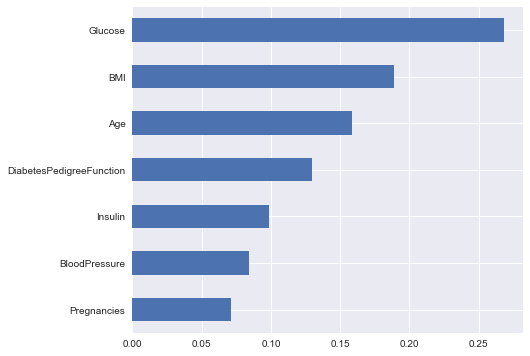

In [84]:
# Random Forests - here i come.....

X_sel = X[feature_cols]

results = []
n_estimator_options = [30, 50, 80, 100, 200, 300, 400, 500, 1000, 2000 ]

for trees in n_estimator_options:
    rfc = RandomForestClassifier(trees, oob_score=True, random_state=42, n_jobs=-1,criterion='gini', class_weight='balanced', max_depth=10)
    r = rfc.fit(X_train, y_train)
    y_oob= r.predict(X_test)
    roc = roc_auc_score(y_test,y_oob)
    print("With trees : ",trees, ', OOB score is ', r.oob_score_, ' and the c-stat :',roc)
    results.append(roc)
    
#pd.Series(results, n_estimator_options).plot();

print(r.feature_importances_)

feature_importances = pd.Series(r.feature_importances_, index=X_sel.columns)
sorted_feature_importances = feature_importances.sort_values(ascending=True)
sorted_feature_importances.plot(kind='barh',figsize=(7,6));

#
#auc = roc_auc_score(y_test, rfc.predict_proba(X_test)[:,1])
#
#X_sel = X_sel.as_matrix()

#for i in range(X_sel.shape[1]):
#     X_t = X_test.copy()
#     np.random.shuffle(X_t[:, i])
#     shuff_auc = roc_auc_score(y_test, rfc.predict_proba(X_t)[:,1])
#     scores[features[i]].append((auc-shuff_auc)/auc)
#
#print ("Features sorted by their score:")
#print (sorted([(round(np.mean(score), 4), feat) for feat, score in scores.items()], reverse=True))
#
#rfc_features = [feat for feat in scores.keys()]
#
#print (rfc_features)
#
#ts = pd.DataFrame({'feature': rfc_features,
#                   'score': [np.mean(score) for score in scores.values()],
#                   })
#
#featp = ts.sort_values(by='score')[-20:].plot(kind='barh', x='feature', y='score', legend=False, figsize=(6, 10))
#plt.title('Random Forest Classifier Feature Importance')
#fig_featp = featp.get_figure()
#fig_featp.savefig('feature_importance_rfc.png', bbox_inches='tight', pad_inches=1)




## DecisionTreeClassifier
#dt_clf = DecisionTreeClassifier(max_depth=None)
#scores = cross_val_score(dt_clf, X_train, y_train)
#print("DecisionTreeClassifier", scores.mean())


# Determine the prediction probability
#pred_pro = dt_clf.predict_proba(X_test)
#print(pred_pro)



## RandomForestClassifier
#rf_clf = RandomForestClassifier(max_depth=None)
#scores = cross_val_score(rf_clf, X_train, y_train)
#print("RandomForestClassifier", scores.mean())

## ExtraTreesClassifier
#extra_trees_clf = ExtraTreesClassifier(max_depth=None)
#scores = cross_val_score(extra_trees_clf, X_train, y_train)
#print("ExtraTreesClassifier", scores.mean())

